In [1]:
# import data

import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
# clean data

def clean_data(df):
    # Drop column: 'Unnamed: 68'
    df = df.drop(columns=['Unnamed: 68'])
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Drop rows with missing data in column: '1990'
    df = df.dropna(subset=['1990'])
    # Replace missing values with 0 in columns: '1960', '1961' and 62 other columns
    df = df.fillna({'1960': 0, '1961': 0, '1962': 0, '1963': 0, '1964': 0, '1965': 0, '1966': 0, '1967': 0, '1968': 0, '1969': 0, '1970': 0, '1971': 0, '1972': 0, '1973': 0, '1974': 0, '1975': 0, '1976': 0, '1977': 0, '1978': 0, '1979': 0, '1980': 0, '1981': 0, '1982': 0, '1983': 0, '1984': 0, '1985': 0, '1986': 0, '1987': 0, '1988': 0, '1989': 0, '1990': 0, '1991': 0, '1992': 0, '1993': 0, '1994': 0, '1995': 0, '1996': 0, '1997': 0, '1998': 0, '1999': 0, '2000': 0, '2001': 0, '2002': 0, '2003': 0, '2004': 0, '2005': 0, '2006': 0, '2007': 0, '2008': 0, '2009': 0, '2010': 0, '2011': 0, '2012': 0, '2013': 0, '2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0, '2019': 0, '2020': 0, '2021': 0, '2022': 0, '2023': 0})
    # Change column type to int64 for columns: '1960', '1961' and 62 other columns
    df = df.astype({'1960': 'int64', '1961': 'int64', '1962': 'int64', '1963': 'int64', '1964': 'int64', '1965': 'int64', '1966': 'int64', '1967': 'int64', '1968': 'int64', '1969': 'int64', '1970': 'int64', '1971': 'int64', '1972': 'int64', '1973': 'int64', '1974': 'int64', '1975': 'int64', '1976': 'int64', '1977': 'int64', '1978': 'int64', '1979': 'int64', '1980': 'int64', '1981': 'int64', '1982': 'int64', '1983': 'int64', '1984': 'int64', '1985': 'int64', '1986': 'int64', '1987': 'int64', '1988': 'int64', '1989': 'int64', '1990': 'int64', '1991': 'int64', '1992': 'int64', '1993': 'int64', '1994': 'int64', '1995': 'int64', '1996': 'int64', '1997': 'int64', '1998': 'int64', '1999': 'int64', '2000': 'int64', '2001': 'int64', '2002': 'int64', '2003': 'int64', '2004': 'int64', '2005': 'int64', '2006': 'int64', '2007': 'int64', '2008': 'int64', '2009': 'int64', '2010': 'int64', '2011': 'int64', '2012': 'int64', '2013': 'int64', '2014': 'int64', '2015': 'int64', '2016': 'int64', '2017': 'int64', '2018': 'int64', '2019': 'int64', '2020': 'int64', '2021': 'int64', '2022': 'int64', '2023': 'int64'})
    # Drop columns: 'Indicator Name', 'Indicator Code'
    df = df.drop(columns=['Indicator Name', 'Indicator Code'])
    return df

cleaned_data = clean_data(data.copy())
cleaned_data.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608,55811,56682,57475,58178,58782,59291,59522,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,106277
1,Africa Eastern and Southern,AFE,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,739108306
2,Afghanistan,AFG,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
3,Africa Western and Central,AFW,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511
4,Angola,AGO,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,36684202


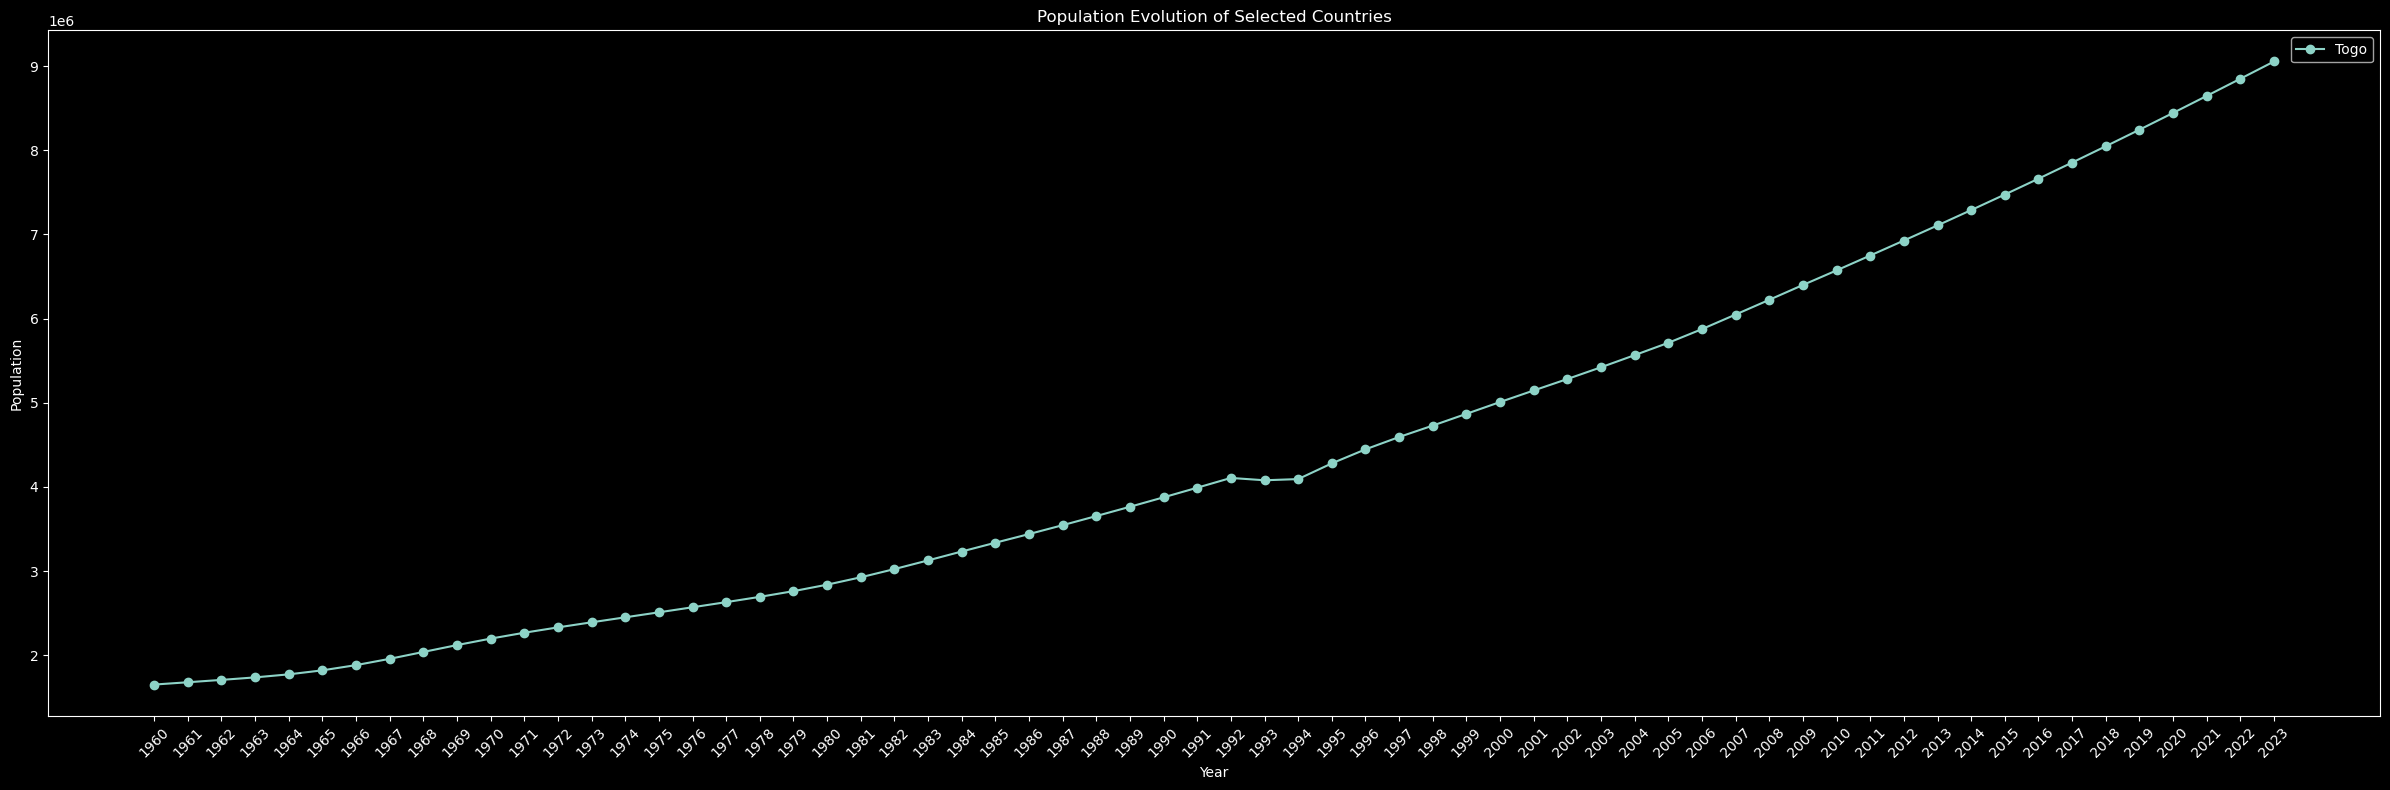

In [8]:
# plot the evolution of a country population per year

import matplotlib.pyplot as plt

def plot_country_population(df, countries):
    # Filter data by country
    filtered_df = df[df["Country Name"].isin(countries)]
    
    # Drop unnecessary columns and set the year as index
    years = list(map(str, range(1960, 2024)))

    # Prepare the plot
    plt.figure(figsize=(24, 8))

    # Plot data for each country
    for country in countries:
        country_data = filtered_df[filtered_df["Country Name"] == country]
        
        # Extract population data
        population_data = country_data[years].values.flatten()
        
        # Plot
        plt.plot(years, population_data, label=country, marker='o')


    # Customize the plot
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population Evolution of Selected Countries')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_country_population(cleaned_data, ['Togo'])
